<a href="https://colab.research.google.com/github/Mav-erick99/Mav-erick99/blob/main/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('stellar-classification-mk-system')
jovian.set_colab_id('12DMZql9l9w7g61AuHgo2q4bL6d_h5VUs')

     |████████████████████████████████| 68 kB 2.8 MB/s 


# STELLAR CLASSIFICATION IN THE MORGAN-KEENAN (MK) SYSTEM

This is a dataset of stars classified in the MK sytem from Kaggle.Along with the classification it also has the apparent magnitude, parallax, error in parallax and the B-V value of these stars.

We can find the temperature, distance from earth in parsec and absolute magnitude of these stars using this dataset.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The dataset can be easily downloaded through kaggle using my kaggle username and kaggle key.

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/vinesmsuic/star-categorization-giants-and-dwarfs' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mavericksahay
Your Kaggle Key: ··········


100%|██████████| 2.06M/2.06M [00:00<00:00, 64.9MB/s]

The dataset has been downloaded and extracted.

In [ ]:
stellar_data_dir = '/content/star-categorization-giants-and-dwarfs'

In [ ]:
import os
os.listdir(stellar_data_dir)

['Star3642_balanced.csv',
 'Star9999_raw.csv',
 'Star99999_raw.csv',
 'Star39552_balanced.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "stellar-classification-mk-system" 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shantanusahay99/stellar-classification-mk-system


'https://jovian.ai/shantanusahay99/stellar-classification-mk-system'

## Data Preparation and Cleaning





In [ ]:
import pandas as pd

In [ ]:
stellar_df=pd.read_csv('/content/star-categorization-giants-and-dwarfs/Star99999_raw.csv')

We can't have empty string in our data so we find them and replace them with np.nan (Not a Number) so that they can easily be dropped from the dataset.

In [ ]:
import numpy as np

stellar_df["SpType"].replace("",np.nan,inplace=True)
stellar_df["Plx"].replace("",np.nan,inplace=True)
stellar_df["e_Plx"].replace("",np.nan,inplace=True)
stellar_df["B-V"].replace("",np.nan,inplace=True)
stellar_df["Vmag"].replace("",np.nan,inplace=True)

In [ ]:
stellar_df.dropna(subset=["SpType"],inplace=True)
stellar_df.dropna(subset=["Plx"],inplace=True)
stellar_df.dropna(subset=["e_Plx"],inplace=True)
stellar_df.dropna(subset=["B-V"],inplace=True)
stellar_df.dropna(subset=["Vmag"],inplace=True)

In [ ]:
stellar_df.at[1843,"e_Plx"]=stellar_df["e_Plx"][1843].strip()

We convert our columns to numeric so that it is possible to operate on them.

In [ ]:
stellar_df["e_Plx"]=pd.to_numeric(stellar_df["e_Plx"],errors="coerce")
stellar_df["Vmag"]=pd.to_numeric(stellar_df["Vmag"],errors="coerce")
stellar_df["Plx"]=pd.to_numeric(stellar_df["Plx"],errors="coerce")
stellar_df["B-V"]=pd.to_numeric(stellar_df["B-V"],errors="coerce")

We drop any entry where the error in parallax is greater than 2.5.

In [ ]:
stellar_df.drop(stellar_df[stellar_df["e_Plx"]>=2.5].index,inplace=True)

We drop any entry where the classification is not proper, rule of the thumb being that the classification has to be in uppercase letters only.

In [ ]:
stellar_df.loc[stellar_df["SpType"].str.isupper()==False]=np.nan

In [ ]:
stellar_df.dropna


<bound method DataFrame.dropna of        Unnamed: 0  Vmag    Plx  e_Plx    B-V    SpType
0             0.0  9.10   3.54   1.39  0.482        F5
2             2.0  6.61   2.81   0.63 -0.019        B9
3             3.0  8.06   7.75   0.97  0.370       F0V
4             4.0  8.55   2.87   1.11  0.902     G8III
6             6.0  9.64  17.74   1.30  0.740        G0
...           ...   ...    ...    ...    ...       ...
99994     99994.0  8.72   3.07   0.87  0.097        B3
99995     99995.0  9.25    NaN    NaN  0.131       A1V
99996     99996.0  8.08   1.07   0.68  1.094        G5
99997     99997.0  6.98   2.97   0.76 -0.143     B1.5V
99998     99998.0  8.51  -1.18   1.34  1.568  K5/M0III

[93373 rows x 6 columns]>

Although negative parallaxes are a thing but they are just an irregularity and not useful in our case so we drop them.

In [ ]:
stellar_df.drop(stellar_df[stellar_df["Plx"]<0].index,inplace=True)

In [ ]:
stellar_df.dropna(subset=["SpType"],inplace=True)
stellar_df.dropna(subset=["Plx"],inplace=True)
stellar_df.dropna(subset=["e_Plx"],inplace=True)
stellar_df.dropna(subset=["B-V"],inplace=True)
stellar_df.dropna(subset=["Vmag"],inplace=True)

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shantanusahay99/stellar-classification-mk-system


'https://jovian.ai/shantanusahay99/stellar-classification-mk-system'

## Exploratory Analysis and Visualization

Now we will just take a look at the various columns of our dataset and also see how there values vary across the dataset.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
stellar_df.describe()

,Unnamed: 0,Vmag,Plx,e_Plx,B-V
count,86036.000000,86036.000000,86036.000000,86036.000000,86036.000000
mean,49842.855014,8.245710,7.150903,1.124656,0.705666
std,28881.851073,1.164379,9.856636,0.369348,0.477800
min,0.000000,-0.010000,0.000000,0.380000,-0.400000
25%,24763.750000,7.610000,2.730000,0.860000,0.364000
50%,49719.000000,8.360000,4.740000,1.070000,0.614000
75%,74835.250000,9.000000,8.350000,1.310000,1.071000
max,99997.000000,12.310000,742.120000,2.490000,5.460000


As we can see from the .describe() method that most of the values of the parallax lie within 8.35 it would be nice to how they are distributed.

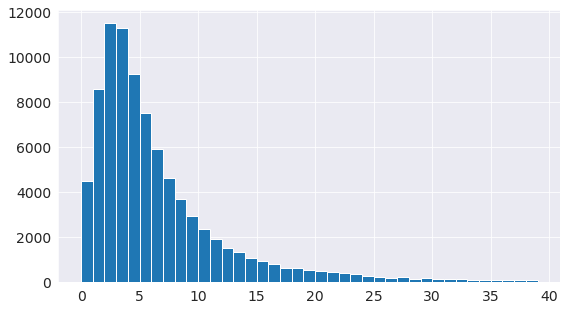

In [ ]:
plt.hist(stellar_df.Plx,bins=range(0,40,1));

Clearly almost all of the values of parallax are very as it should be because stars are very far away fromm us.

Next we see how the errors in parallax are distributed.

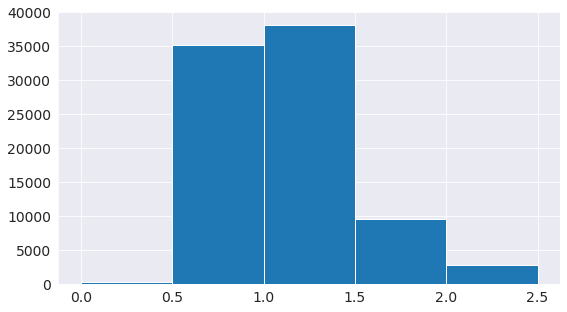

In [ ]:
plt.hist(stellar_df.e_Plx,bins=[0,0.5,1.0,1.5,2.0,2.5]);

Most of the stars have an error of 0.5 to 1.5 in their stellar parallax.

Here we arre checking that how many of hese stars would be visible to the human eye based on the fact that any star with Apparent Magnitude greater than 6.5 is invisible to the human eye.

In [ ]:
stellar_df.loc[stellar_df["Vmag"]>6.5,"Visible"]=False
stellar_df.loc[stellar_df["Vmag"]<=6.5,"Visible"]=True

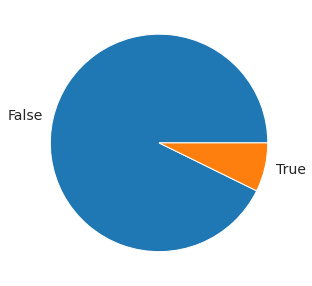

In [ ]:
df=stellar_df.groupby("Visible")["Vmag"].count()
#color_dict={True:"Visible",False:"Invisible"}
#plt.pie(df.Vmag,labels=df.keys());
plt.pie(df,labels=df.keys());

As is clear from this pie chart that a huge chunk of these stars is invisible to the naked eye.

Next we see how are the parallaxes of these visible and invisible stars are distributed.

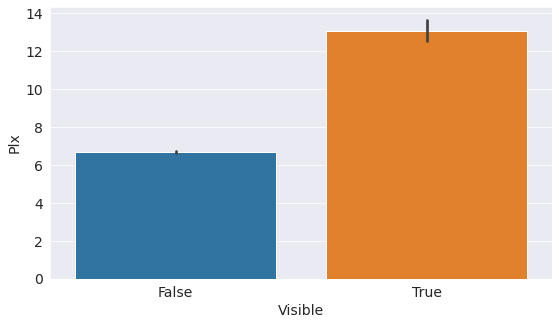

In [ ]:
sns.barplot(x="Visible",y="Plx",data=stellar_df);

So very close by stars(having large parallax) which are not very bright are also not visible.

Here we observe how the Apparent magnitude of the stars changes with the Parallax.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


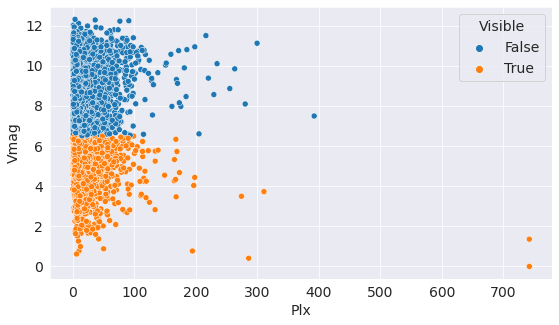

In [ ]:
sns.scatterplot(stellar_df.Plx,stellar_df.Vmag,hue=stellar_df.Visible);

On the whole the plot is very simplistic but amongst the outlies we see that even some of the closest stars are invisible. So just because we see a star closer to earth we can't say that it will be visible to the naked eye.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shantanusahay99/stellar-classification-mk-system


'https://jovian.ai/shantanusahay99/stellar-classification-mk-system'

## Asking and Answering Questions

Now we'll find some more quantities like temperature and absolute magnitude of the stars in our dataset.



####Q1: Classify the stars as Hot or Cold baased on their B-V values.

Any star having a B-V value greater than 1.5 considered Cool and one with B-V value less than 1.5 is considered Hot.

In [ ]:
stellar_df['B-V'] = pd.to_numeric(stellar_df['B-V'],errors='coerce')

stellar_df.loc[stellar_df["B-V"] > (1.5), 'hot_cool'] = "Cool"
stellar_df.loc[stellar_df["B-V"] < (1.5), 'hot_cool'] = "Hot"

####Q2: Find the distances of the stars in parsec.

We will simply use the formula 

Dist in parsec=1/(Stellar Parallax)

In [ ]:
stellar_df['Plx'] = pd.to_numeric(stellar_df['Plx'],errors='coerce')
stellar_df = stellar_df[stellar_df.Plx != 0]
stellar_df["parsec"]=stellar_df.Plx.apply(lambda x: 1/x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


####Q3: Find the absolute magnitude of the stars.

Here we'll use the formula 

ABSOLUTE MAGNUITUDE, M=m+5(log10(p)+1)

M=Amag

m=Vmag

p=Plx

In [ ]:
stellar_df['Vmag'] = pd.to_numeric(stellar_df['Vmag'],errors='coerce')
stellar_df["Amag"]=stellar_df["Vmag"]+5*(np.log10(stellar_df["Vmag"])+1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The smaller the Absolute magnitude, Brighter the object

####Q4: What are the temperatures of the stars in the datset? Also plot it against the Absolute magnitude of the stars.

For temperature we'll use the formula

Temperature, T=4600K((1/(0.92*BV+1.7))+(1/(0.92*BV+0.62))


In [ ]:
#T=4600K((1/(0.92*BV+1.7))+(1/(0.92*BV+0.62))
stellar_df["Temp"]=4600*(1/(0.92*stellar_df["B-V"]+1.7)+1/(0.92*stellar_df["B-V"]+0.62))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


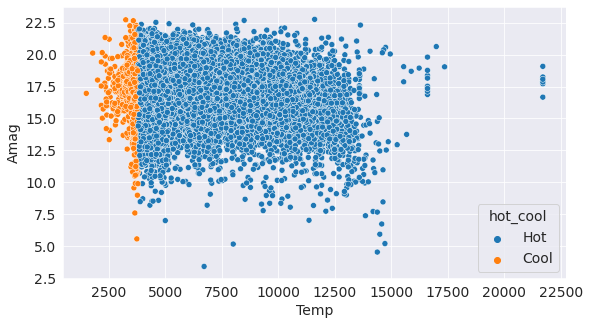

In [ ]:
sns.scatterplot("Temp","Amag",hue="hot_cool",data=stellar_df);

We see that mopst of the cooler stars are nort very bright(have a high Amag value).

####Q5: This datasets had some values of zero parallax which were removed while cleaning.Explain these anamalous values. Also find the percentage of stars that are very far away from the earth in this dataset.

Technically there should be no stars with zero parallax but the stars which are so far away that their parallaxes tend to zero are said to have zero parallax. They are used as screen against which parallax of other stars are calculated.

In [ ]:
far_star=stellar_df.Plx.where(stellar_df.Plx<0.02).count()
all_star=len(stellar_df)
print(f"Out of {all_star} in our dataset {far_star} are the farthest as they have a parallax of less than 0.02")

Out of 86008 in our dataset 32 are the farthest as they have a parallax of less than 0.02


In [ ]:
print(f"So a total of {(far_star/all_star)*100}% stars from our dataset can be used as stationary stars")

So a total of 0.037205841317086784% stars from our dataset can be used as stationary stars


Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shantanusahay99/stellar-classification-mk-system


'https://jovian.ai/shantanusahay99/stellar-classification-mk-system'

## Inferences and Conclusion



*   Most of these stars are really far away
*   More than 75% of the stars are actually not visible to the human eye
*   The temp of these stars is mostly greater than 300kK so they must be Main   Sequence stars
*   Even if a star is close by it doesn't need to be visible. It depends on its chemical constitution






In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shantanusahay99/stellar-classification-mk-system


'https://jovian.ai/shantanusahay99/stellar-classification-mk-system'

## References and Future Work

Following websites were very useful to me:

1. https://en.wikipedia.org/wiki/Stellar_classification
2. https://www.kaggle.com/learn/overview
3. https://www.kaggle.com/learn/overview
4. https://www.geeksforgeeks.org/
5. https://stackexchange.com/filters/169


Further with this dataset one could clasiify the stars in their various classes


> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shantanusahay99/stellar-classification-mk-system


'https://jovian.ai/shantanusahay99/stellar-classification-mk-system'

In [ ]:
jovian.submit(assignment="zero-to-pandas-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shantanusahay99/stellar-classification-mk-system
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
